In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Data

#### Load data from storage

In [16]:
x1=pd.read_csv(r"C:\Users\soniv\Desktop\Data-Collisions.csv")

C:\Users\soniv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Basic insight of original data

In [17]:
x1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [18]:
x1.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [19]:
x1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [20]:
x1.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [21]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [22]:
x1.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

# Data preprocessing

## Data cleaning, removing Nan values and converting categorical data into numerical data:

In [23]:
data=x1[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SEVERITYCODE']]

In [24]:
data['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2],inplace=True)
data['COLLISIONTYPE'].replace(to_replace=['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn'
,'Sideswipe'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
data['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
data['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
data['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'], value=[0,1,2,3,4,5,6,7,8],inplace=True)


C:\Users\soniv\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Basic insight of data for machine learning

In [25]:
data.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,2.0,0.0,2,2,11,4.0,8.0,5.0,2
1,1.0,9.0,2,2,16,6.0,8.0,2.0,1
2,1.0,5.0,4,3,14,4.0,0.0,5.0,1
3,1.0,4.0,3,3,11,1.0,0.0,5.0,1
4,2.0,0.0,2,2,11,6.0,8.0,5.0,2


In [26]:
data.tail()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
194668,1.0,2.0,3,2,11,1.0,0.0,5.0,2
194669,1.0,7.0,2,2,14,6.0,8.0,5.0,1
194670,2.0,3.0,3,2,11,1.0,0.0,5.0,2
194671,2.0,1.0,2,1,51,1.0,0.0,6.0,2
194672,1.0,7.0,2,2,14,1.0,8.0,5.0,1


In [27]:
data.dtypes

ADDRTYPE         float64
COLLISIONTYPE    float64
PERSONCOUNT        int64
VEHCOUNT           int64
SDOT_COLCODE       int64
WEATHER          float64
ROADCOND         float64
LIGHTCOND        float64
SEVERITYCODE       int64
dtype: object

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ADDRTYPE       192747 non-null  float64
 1   COLLISIONTYPE  189769 non-null  float64
 2   PERSONCOUNT    194673 non-null  int64  
 3   VEHCOUNT       194673 non-null  int64  
 4   SDOT_COLCODE   194673 non-null  int64  
 5   WEATHER        189592 non-null  float64
 6   ROADCOND       189661 non-null  float64
 7   LIGHTCOND      189503 non-null  float64
 8   SEVERITYCODE   194673 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 13.4 MB


In [29]:
data.describe()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
count,192747.000000,189769.000000,194673.000000,194673.000000,194673.000000,189592.000000,189661.000000,189503.000000,194673.000000
mean,1.333697,4.504034,2.444427,1.920780,13.867768,3.083843,2.599802,4.399825,1.298901
std,0.479726,2.784029,1.345929,0.631047,6.868755,2.855272,3.651150,1.713750,0.457778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,2.000000,2.000000,11.000000,1.000000,0.000000,2.000000,1.000000
50%,1.000000,5.000000,2.000000,2.000000,13.000000,1.000000,0.000000,5.000000,1.000000
75%,2.000000,7.000000,3.000000,2.000000,14.000000,6.000000,8.000000,5.000000,2.000000
max,2.000000,9.000000,81.000000,12.000000,69.000000,10.000000,8.000000,8.000000,2.000000


In [30]:
data.shape

(194673, 9)

In [32]:
#Removing Nan values
data.dropna(subset=['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=0, inplace=True)

<ipython-input-32-868f70350829>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=0, inplace=True)


In [33]:
data.shape

(187504, 9)

# Exploratory analysis

## 1. Descriptive analysis

In [34]:
d1=data['ADDRTYPE'].value_counts()
d1

1.0    123315
2.0     63447
0.0       742
Name: ADDRTYPE, dtype: int64

In [35]:
d2=data['COLLISIONTYPE'].value_counts()
d2

5.0    46679
0.0    34555
7.0    33794
4.0    23440
9.0    18442
3.0    13659
6.0     6589
1.0     5399
8.0     2936
2.0     2011
Name: COLLISIONTYPE, dtype: int64

In [36]:
d3=data['PERSONCOUNT'].value_counts()
d3

2     109553
3      34984
4      14389
1      11581
5       6560
0       5505
6       2695
7       1126
8        533
9        214
10       127
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [37]:
d4=data['VEHCOUNT'].value_counts()
d4

2     145663
1      25535
3      12940
4       2418
5        529
0        196
6        144
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [38]:
d5=data['SDOT_COLCODE'].value_counts()
d5

11    83096
14    52579
16     9786
28     8732
0      7308
24     6375
13     5727
26     4620
18     3023
15     1570
12     1408
51     1288
29      472
21      180
56      178
27      161
54      134
23      122
48      106
31      103
25      101
34       92
64       74
69       67
33       53
55       50
66       23
22       16
32       12
53        9
44        8
61        7
35        6
68        4
36        4
58        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [39]:
d6=data['WEATHER'].value_counts()
d6

1.0     110493
6.0      32969
4.0      27545
10.0     14057
9.0        896
3.0        790
2.0        563
8.0        112
0.0         49
7.0         25
5.0          5
Name: WEATHER, dtype: int64

In [40]:
d7=data['ROADCOND'].value_counts()
d7

0.0    123730
8.0     47213
7.0     14005
1.0      1192
5.0       992
3.0       124
6.0       111
4.0        73
2.0        64
Name: ROADCOND, dtype: int64

In [41]:
d8=data['LIGHTCOND'].value_counts()
d8

5.0    115395
2.0     48233
8.0     12597
6.0      5842
4.0      2490
0.0      1525
1.0      1184
7.0       227
3.0        11
Name: LIGHTCOND, dtype: int64

## 2. Box Plot Analysis

In [42]:
import seaborn as sns

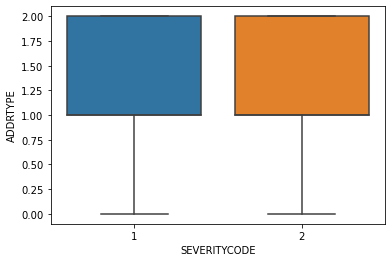

In [43]:
#B1
sns.boxplot(x=data['SEVERITYCODE'],y=data['ADDRTYPE'])

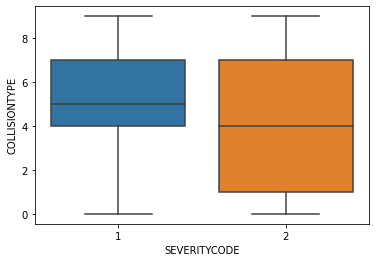

In [44]:
#B2
sns.boxplot(x=data['SEVERITYCODE'],y=data['COLLISIONTYPE'])

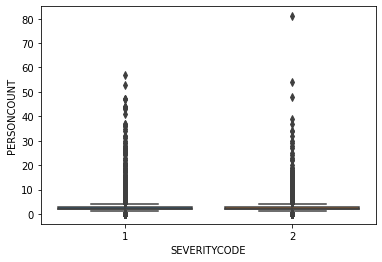

In [45]:
#B3
sns.boxplot(x=data['SEVERITYCODE'],y=data['PERSONCOUNT'])

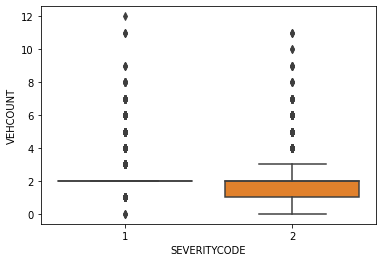

In [46]:
#B4
sns.boxplot(x=data['SEVERITYCODE'],y=data['VEHCOUNT'])

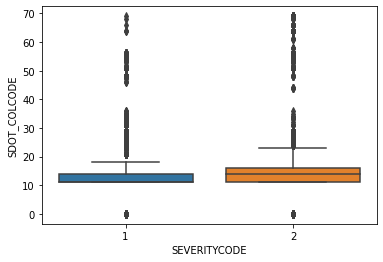

In [47]:
#B5
sns.boxplot(x=data['SEVERITYCODE'],y=data['SDOT_COLCODE'])

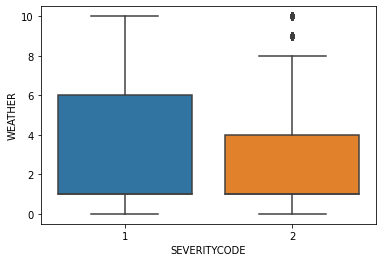

In [48]:
#B6
sns.boxplot(x=data['SEVERITYCODE'],y=data['WEATHER'])

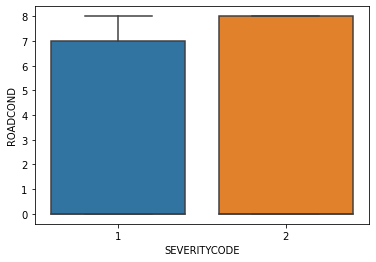

In [49]:
#B7
sns.boxplot(x=data['SEVERITYCODE'],y=data['ROADCOND'])

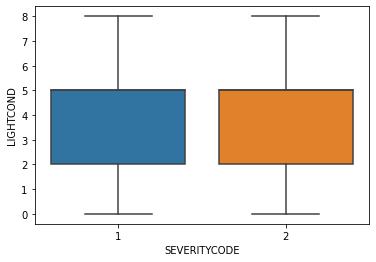

In [50]:
#B8
sns.boxplot(x=data['SEVERITYCODE'],y=data['LIGHTCOND'])

## 3. GroupBy Analysis

In [51]:
g1=data.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
g1

ADDRTYPE  SEVERITYCODE
0.0       1               0.892183
          2               0.107817
1.0       1               0.761367
          2               0.238633
2.0       1               0.568727
          2               0.431273
Name: SEVERITYCODE, dtype: float64

In [52]:
g2=data.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
g2

COLLISIONTYPE  SEVERITYCODE
0.0            1               0.606859
               2               0.393141
1.0            2               0.876273
               1               0.123727
2.0            1               0.567877
               2               0.432123
3.0            1               0.604656
               2               0.395344
4.0            1               0.741254
               2               0.258746
5.0            1               0.943272
               2               0.056728
6.0            2               0.898315
               1               0.101685
7.0            1               0.569006
               2               0.430994
8.0            1               0.793937
               2               0.206063
9.0            1               0.865362
               2               0.134638
Name: SEVERITYCODE, dtype: float64

In [53]:
g3=data.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
g3

PERSONCOUNT  SEVERITYCODE
0            1               0.680654
             2               0.319346
1            1               0.741818
             2               0.258182
2            1               0.752494
                               ...   
48           2               1.000000
53           1               1.000000
54           2               1.000000
57           1               1.000000
81           2               1.000000
Name: SEVERITYCODE, Length: 79, dtype: float64

In [54]:
g4=data.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
g4

VEHCOUNT  SEVERITYCODE
0         2               0.984694
          1               0.015306
1         2               0.549481
          1               0.450519
2         1               0.754426
          2               0.245574
3         1               0.579366
          2               0.420634
4         1               0.555831
          2               0.444169
5         1               0.506616
          2               0.493384
6         1               0.590278
          2               0.409722
7         1               0.521739
          2               0.478261
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64

In [55]:
g5=data.groupby(['SDOT_COLCODE'])['SEVERITYCODE'].value_counts(normalize=True)
g5

SDOT_COLCODE  SEVERITYCODE
0             1               0.932540
              2               0.067460
11            1               0.711791
              2               0.288209
12            1               0.980824
                                ...   
66            1               0.043478
68            2               0.750000
              1               0.250000
69            2               0.985075
              1               0.014925
Name: SEVERITYCODE, Length: 73, dtype: float64

In [56]:
g6=data.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
g6

WEATHER  SEVERITYCODE
0.0      1               0.734694
         2               0.265306
1.0      1               0.676740
         2               0.323260
2.0      1               0.669627
         2               0.330373
3.0      1               0.855696
         2               0.144304
4.0      1               0.683754
         2               0.316246
5.0      2               0.600000
         1               0.400000
6.0      1               0.662289
         2               0.337711
7.0      1               0.720000
         2               0.280000
8.0      1               0.758929
         2               0.241071
9.0      1               0.813616
         2               0.186384
10.0     1               0.943800
         2               0.056200
Name: SEVERITYCODE, dtype: float64

In [57]:
g7=data.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
g7

ROADCOND  SEVERITYCODE
0.0       1               0.677540
          2               0.322460
1.0       1               0.774329
          2               0.225671
2.0       1               0.625000
          2               0.375000
3.0       1               0.661290
          2               0.338710
4.0       1               0.698630
          2               0.301370
5.0       1               0.833669
          2               0.166331
6.0       1               0.738739
          2               0.261261
7.0       1               0.947947
          2               0.052053
8.0       1               0.667634
          2               0.332366
Name: SEVERITYCODE, dtype: float64

In [58]:
g8=data.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)
g8

LIGHTCOND  SEVERITYCODE
0.0        1               0.780984
           2               0.219016
1.0        1               0.733953
           2               0.266047
2.0        1               0.701097
           2               0.298903
3.0        1               0.636364
           2               0.363636
4.0        1               0.669478
           2               0.330522
5.0        1               0.667230
           2               0.332770
6.0        1               0.668607
           2               0.331393
7.0        1               0.770925
           2               0.229075
8.0        1               0.953243
           2               0.046757
Name: SEVERITYCODE, dtype: float64

## 4. Pearson correlation analysis

In [59]:
from scipy import stats

In [60]:
from scipy.stats import pearsonr

In [61]:
#p1
pearson_coef,p_value=stats.pearsonr(data['ADDRTYPE'],data['SEVERITYCODE'])
pearson_coef,p_value

(0.19971784115718683, 0.0)

In [62]:
#p2
pearson_coef,p_value=stats.pearsonr(data['COLLISIONTYPE'],data['SEVERITYCODE'])
pearson_coef,p_value

(-0.12834127033207823, 0.0)

In [63]:
#p3
pearson_coef,p_value=stats.pearsonr(data['PERSONCOUNT'],data['SEVERITYCODE'])
pearson_coef,p_value

(0.12836812235055656, 0.0)

In [64]:
#p4
pearson_coef,p_value=stats.pearsonr(data['VEHCOUNT'],data['SEVERITYCODE'])
pearson_coef,p_value

(-0.08101380112175846, 1.7783991454321444e-270)

In [65]:
#p5
pearson_coef,p_value=stats.pearsonr(data['SDOT_COLCODE'],data['SEVERITYCODE'])
pearson_coef,p_value

(0.1817830922853693, 0.0)

In [66]:
#p6
pearson_coef,p_value=stats.pearsonr(data['WEATHER'],data['SEVERITYCODE'])
pearson_coef,p_value

(-0.10547912664327103, 0.0)

In [67]:
#p7
pearson_coef,p_value=stats.pearsonr(data['ROADCOND'],data['SEVERITYCODE'])
pearson_coef,p_value

(-0.045903112657007195, 5.253468537937449e-88)

In [68]:
#8
pearson_coef,p_value=stats.pearsonr(data['LIGHTCOND'],data['SEVERITYCODE'])
pearson_coef,p_value

(-0.055773095699174706, 4.672610899620179e-129)

# Modeling and accuracy analysis

In [69]:
x=data[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [70]:
y=data[['SEVERITYCODE']]

# Decision tree

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)


In [72]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(x_train,y_train)
yhat = DT.predict(x_test)

In [73]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, yhat))

Accuracy:  0.7509666408895763


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[24383  1813]
 [ 7526  3779]]
              precision    recall  f1-score   support

           1       0.76      0.93      0.84     26196
           2       0.68      0.33      0.45     11305

    accuracy                           0.75     37501
   macro avg       0.72      0.63      0.64     37501
weighted avg       0.74      0.75      0.72     37501



# Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

C:\Users\soniv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [76]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5579350863787483

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[24780  1416]
 [ 8975  2330]]
              precision    recall  f1-score   support

           1       0.73      0.95      0.83     26196
           2       0.62      0.21      0.31     11305

    accuracy                           0.72     37501
   macro avg       0.68      0.58      0.57     37501
weighted avg       0.70      0.72      0.67     37501



# KNN

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)

In [79]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
K = 10
mean_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):  
    model1 = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=model1.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

<ipython-input-79-313d690f27d9>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1 = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-79-313d690f27d9>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1 = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-79-313d690f27d9>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1 = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-79-313d690f27d9>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1 = KNeighborsClass

array([0.70590118, 0.73686035, 0.72704728, 0.74155356, 0.73382043,
       0.74459348, 0.74014026, 0.75099331, 0.7476334 ])

#### best K value is 8

In [80]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
    

In [81]:
model1 = KNeighborsClassifier(n_neighbors = 8).fit(x_train,y_train)
yhat=model1.predict(x_test)

<ipython-input-81-e5d41ba491d9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1 = KNeighborsClassifier(n_neighbors = 8).fit(x_train,y_train)


In [82]:
mean_acc=metrics.accuracy_score(y_test,yhat)
mean_acc

0.7509933068451508

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[24416  1780]
 [ 7558  3747]]
              precision    recall  f1-score   support

           1       0.76      0.93      0.84     26196
           2       0.68      0.33      0.45     11305

    accuracy                           0.75     37501
   macro avg       0.72      0.63      0.64     37501
weighted avg       0.74      0.75      0.72     37501



## END